# Case study to identify the factors for loan defaults based on the historic data.

This will be useful to identify the loan applications which needs to be rejected.

Key Findings 

- Loans which have gone Default have Verification Status as Verified.
- Loans Taken for purpose of Small Business has highest % of becoming default
- NE State is having the highest value of default percentage of loan.
- Loan Defaults are happening more in 60months term then 36 months.
- Loan Defaults are happening more for Grade G and F and it is highest in G Grade.
- Default Rate is HIGHEST in F5 SUB-GRADE followed by G3
- Default Loans are highest for customer who have 10+ years of Employment.
- As number of Public Record Bankruptcies increases Default % increases. 
- DTI vs Funded_amount_investment vs Loan status there is a negative correlation between DTI and Loan status
- Loans given with high interest rates greater than 24 % are having very high percentage of default rate.
- DTI ranging from 20 -24 are having high percentage of default loans.
- Default Percentage is inversely propostional to Annual Income. 
- As per the Bivariate Analysis we can see that % of Default loan increases as Grade decreases.we can see that % of Default loan is high in 60 months except Grade G
- As per Bivariate Analysis, we can see that Education Purpose of the loan is having highest Default percentage for 60 months and small Business is having highest default percentage in 36 months
- We can see that Home ownership type None is having highest default rate whose purpose is for home improvement.Customers are availing the loan who has no home but still availing loan for home improvement and defaulting
Default ratio of Customers who is defaulting for home loan is more than home improvement loan other than NONE category

In [1]:
import numpy as np
import pandas as pd
import re
import datetime as dt

import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="white")

pd.options.mode.chained_assignment = None


In [2]:
#Creating Loan Dataframe 
#File_Location = "C:\Users\parth.trivedi\Downloads\Upgrad\Lending_Case_Study\loan\loan.csv"
df_loan = pd.read_csv("loan.csv",encoding='ISO-8859-1',sep ="," ,low_memory=False)
df_loan.shape

(39717, 111)

##### PART 1
# Data Understanding and Data Cleaning 

# Finding out how many columns are having NULL values. 


In [3]:
df_loan.isnull().sum()

id                                    0
member_id                             0
loan_amnt                             0
funded_amnt                           0
funded_amnt_inv                       0
term                                  0
int_rate                              0
installment                           0
grade                                 0
sub_grade                             0
emp_title                          2459
emp_length                         1075
home_ownership                        0
annual_inc                            0
verification_status                   0
issue_d                               0
loan_status                           0
pymnt_plan                            0
url                                   0
desc                              12940
purpose                               0
title                                11
zip_code                              0
addr_state                            0
dti                                   0


In [4]:
# Removing all the columns which are having all NULL values. 
df_loan.dropna(how='all',axis=1,inplace = True)

# drop duplicate rows 
df_loan.drop_duplicates(keep='last')

# Removing all the rows which are having all NULL values. 
df_loan.dropna(how='all',inplace = True)


#Remove columns which have 90% or above null data. A column having more than 90% null values may not be useful
# in the anlysis
#df_master.dropna (axis=1, thresh=round(df_master.shape[0] * 0.9) ,inplace=True ) 

#Remove rows which have more than 10% null values from the existing dataframe
#df_master.dropna(how='all' ,thresh=round(df_master.shape[1] * 0.9) ,inplace=True)
df_loan.info()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 57 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null object
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null object
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_pl

In [5]:
# Removing % from Interest Rate
df_loan['int_rate'] = pd.to_numeric(df_loan['int_rate'].astype(str).str[:-1], errors='coerce')
df_loan['revol_util'] = pd.to_numeric(df_loan['revol_util'].astype(str).str[:-1], errors='coerce')


In [6]:
# Strip Years from column
df_loan['emp_length'] = df_loan['emp_length'].str.rstrip('years')

In [7]:
#Strip + from column
df_loan['emp_length'] = df_loan['emp_length'].str.replace('+','')

In [8]:
#Replace < 1 to 0 as its less than 1 year 
df_loan['emp_length'] = df_loan['emp_length'].str.replace('< 1','0')

In [9]:
#Changing the data type to int 
df_loan['emp_length'] = pd.to_numeric(df_loan['emp_length'].str.replace(r'\D+', ''), errors='coerce')

In [10]:
# Checking the NULL Percentage and take decison to remove any columns . 
round(100*(df_loan.isnull().sum()/len(df_loan.index)),2)

id                             0.00
member_id                      0.00
loan_amnt                      0.00
funded_amnt                    0.00
funded_amnt_inv                0.00
term                           0.00
int_rate                       0.00
installment                    0.00
grade                          0.00
sub_grade                      0.00
emp_title                      6.19
emp_length                     2.71
home_ownership                 0.00
annual_inc                     0.00
verification_status            0.00
issue_d                        0.00
loan_status                    0.00
pymnt_plan                     0.00
url                            0.00
desc                          32.58
purpose                        0.00
title                          0.03
zip_code                       0.00
addr_state                     0.00
dti                            0.00
delinq_2yrs                    0.00
earliest_cr_line               0.00
inq_last_6mths              

In [11]:
# Dropping the column  as it is highest values of null values and these are non-required columns. 
df_loan = df_loan.drop('mths_since_last_delinq',axis=1)
df_loan = df_loan.drop('mths_since_last_record',axis=1)
df_loan = df_loan.drop('next_pymnt_d',axis=1)
df_loan = df_loan.drop('desc',axis=1)


In [12]:
df_loan.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 39717 entries, 0 to 39716
Data columns (total 53 columns):
id                            39717 non-null int64
member_id                     39717 non-null int64
loan_amnt                     39717 non-null int64
funded_amnt                   39717 non-null int64
funded_amnt_inv               39717 non-null float64
term                          39717 non-null object
int_rate                      39717 non-null float64
installment                   39717 non-null float64
grade                         39717 non-null object
sub_grade                     39717 non-null object
emp_title                     37258 non-null object
emp_length                    38642 non-null float64
home_ownership                39717 non-null object
annual_inc                    39717 non-null float64
verification_status           39717 non-null object
issue_d                       39717 non-null object
loan_status                   39717 non-null object
pymnt_

In [13]:
# Checking the NULL Percentage and take decison to remove any columns . 
round(100*(df_loan.isnull().sum()/len(df_loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     6.19
emp_length                    2.71
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.03
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [14]:
df_loan.dropna(subset =['emp_title'],inplace =True)
df_loan.dropna(subset =['title'],inplace =True)

In [15]:
# Checking the NULL Percentage and take decison to remove any columns . 
round(100*(df_loan.isnull().sum()/len(df_loan.index)),2)

id                            0.00
member_id                     0.00
loan_amnt                     0.00
funded_amnt                   0.00
funded_amnt_inv               0.00
term                          0.00
int_rate                      0.00
installment                   0.00
grade                         0.00
sub_grade                     0.00
emp_title                     0.00
emp_length                    0.15
home_ownership                0.00
annual_inc                    0.00
verification_status           0.00
issue_d                       0.00
loan_status                   0.00
pymnt_plan                    0.00
url                           0.00
purpose                       0.00
title                         0.00
zip_code                      0.00
addr_state                    0.00
dti                           0.00
delinq_2yrs                   0.00
earliest_cr_line              0.00
inq_last_6mths                0.00
open_acc                      0.00
pub_rec             

In [16]:
print ("Employment Years Mean - {}".format(round(df_loan['emp_length'].mean())))
print ("Employment Years Median - {}".format(round(df_loan['emp_length'].median())))

Employment Years Mean - 5
Employment Years Median - 4


In [17]:
print ("Revoling credit util Mean - {}".format(round(df_loan['revol_util'].mean())))
print ("Revoling credit util Median - {}".format(round(df_loan['revol_util'].median())))

Revoling credit util Mean - 49
Revoling credit util Median - 50


### In this dataset the median and mean and very similar and hence 'Median' can be used for the impute. However this is not followed in the current analysis. NA values will be ignored in the analysis since these are less in number

# Part 2 - Data Analysis 






In [18]:
# Removing the Current status of Loan as they are not defaulted or they have fully paid. They are not part of our analysis. 
df_loan = df_loan[df_loan["loan_status"] != "Current"]

In [19]:
df_loan['loan_status'].unique()

array(['Charged Off', 'Fully Paid'], dtype=object)

In [20]:
# Changing the status to 0 and 1 based on Default or fully paid. 
df_loan["loan_status"] = df_loan["loan_status"].apply(lambda x:1 if x == 'Fully Paid' else 0)

In [21]:
df_loan['loan_status'].unique()

array([0, 1], dtype=int64)

In [22]:
# Plotting the Graphs for UNIVARIATE VARIABLES> 

# function defined to plot the univariate analysis
import matplotlib.pyplot as plt
import seaborn as sns
from pylab import rcParams


def plot_bar_cust (x_data ,y_data,ylabel ,title,xlabel,xticks_rotation = 0 ,text_rotation = 0):
    rcParams['figure.figsize'] = 15, 7
    bars = plt.bar( x_data, y_data, align='center', alpha=1)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.xticks(rotation=xticks_rotation)

    for bar in bars:
        ht = bar.get_height()
        plt.text(bar.get_x(), ht + .005, ht,rotation=text_rotation)
    
    plt.show()

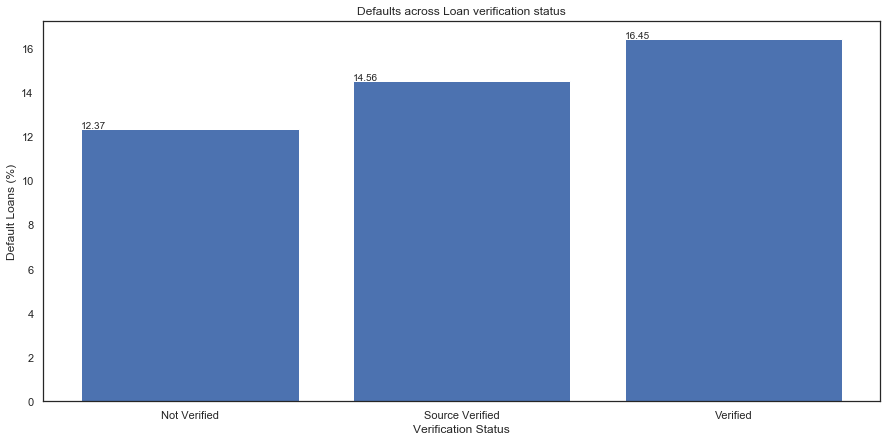

In [23]:
#Data anaysis for some categorical  variables such as Verification Status of the loan

df_loan_grp1 = df_loan.groupby("verification_status")
x_val = df_loan["verification_status"].unique()
x_val.sort()

y_val = round((df_loan_grp1["loan_status"].count()-df_loan_grp1["loan_status"].sum()) / df_loan_grp1["loan_status"].count() * 100,2)


plot_bar_cust (x_val ,y_val,'Default Loans (%)' \
               ,'Defaults across Loan verification status' \
               ,'Verification Status',0)


# Conclusion 1 : Loans which have higher Default have Verification Status as Verified. 

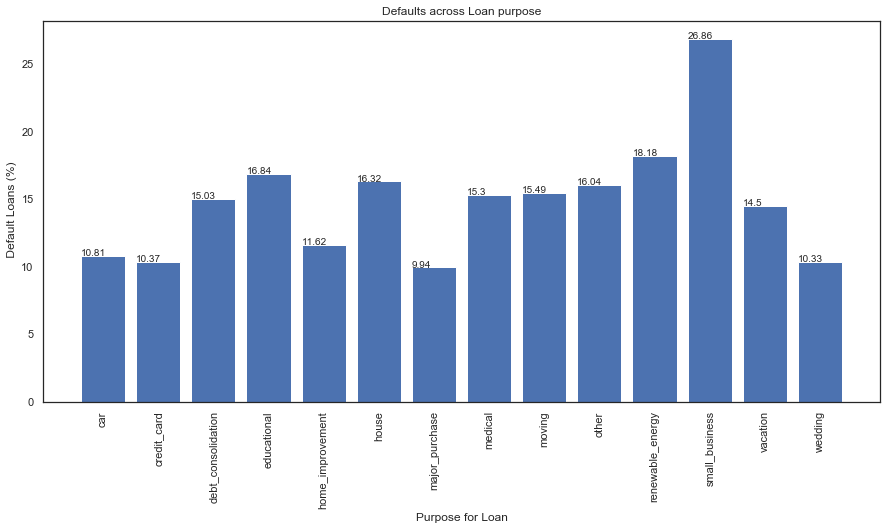

In [24]:
#Data anaysis for some categorical variables such as Purpose of the loan

df_loan_grp2 = df_loan.groupby("purpose")
x_val = df_loan["purpose"].unique()
x_val.sort()

y_val = round((df_loan_grp2["loan_status"].count()-df_loan_grp2["loan_status"].sum()) / df_loan_grp2["loan_status"].count() * 100,2)

plot_bar_cust (x_val ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan purpose' \
               ,'Purpose for Loan',90)


# Loans Taken for purpose of Small Business has highest % of becoming default 

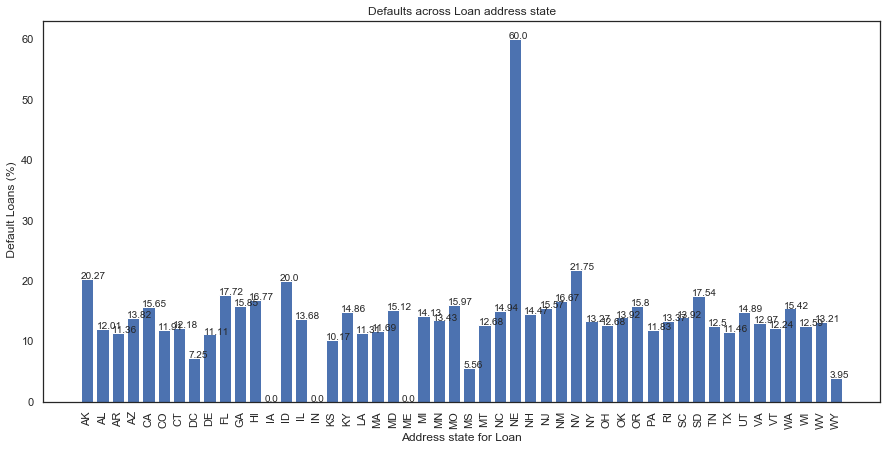

In [25]:
#Data anaysis for some categorical variables such as Address state of the loan

df_loan_grp3 = df_loan.groupby("addr_state")
x_val = df_loan["addr_state"].unique()
x_val.sort()

y_val = round((df_loan_grp3["loan_status"].count()-df_loan_grp3["loan_status"].sum()) / df_loan_grp3["loan_status"].count() * 100,2)

plot_bar_cust (x_val ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan address state' \
               ,'Address state for Loan',90)



# NE State is having the highest value of default percentage of loan

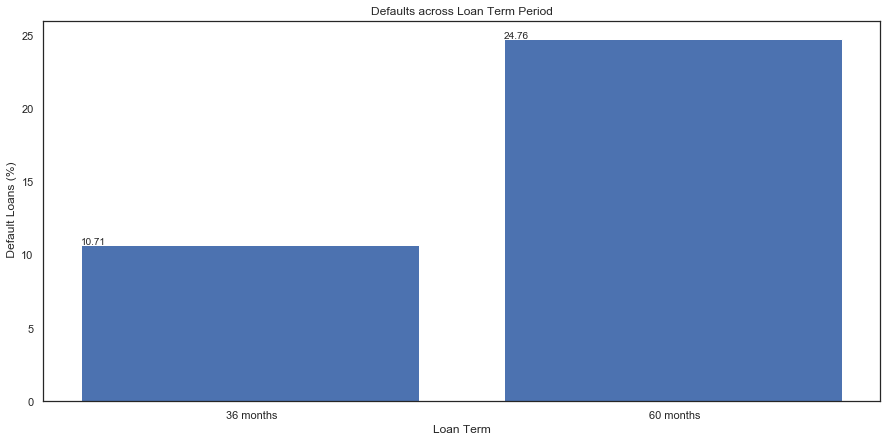

In [26]:
#Data anaysis for some categorical variables such as Term Period of the loan

df_loan_grp4 = df_loan.groupby("term")
x_val = df_loan["term"].unique()
x_val.sort()

y_val = round((df_loan_grp4["loan_status"].count()-df_loan_grp4["loan_status"].sum()) / df_loan_grp4["loan_status"].count() * 100,2)

plot_bar_cust (x_val ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan Term Period' \
               ,'Loan Term',0)

# Loan Defaults are happening more in 60months term then 36 months. 

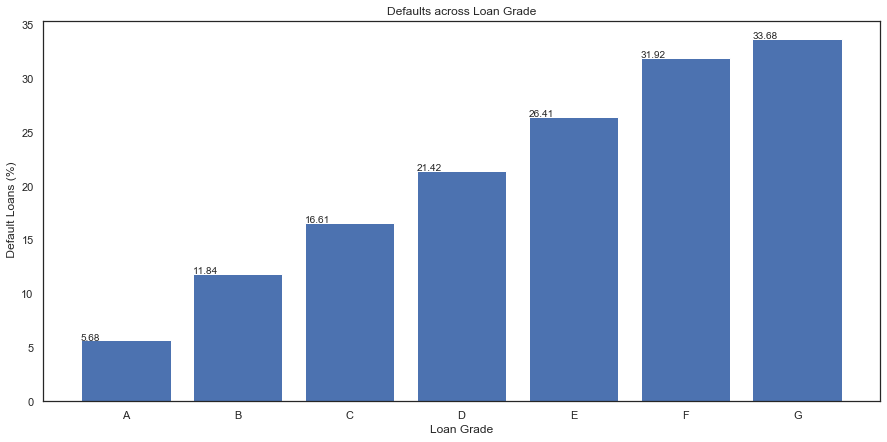

In [27]:
#Data anaysis for some categorical variables such as Grade of the loan

df_loan_grp5 = df_loan.groupby("grade")
x_val = df_loan["grade"].unique()
x_val.sort()

y_val = round((df_loan_grp5["loan_status"].count()-df_loan_grp5["loan_status"].sum()) / df_loan_grp5["loan_status"].count() * 100,2)

plot_bar_cust (x_val ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan Grade' \
               ,'Loan Grade',0)

# Loan Defaults are happening more for Grade G and F and it is highest in G Grade. 

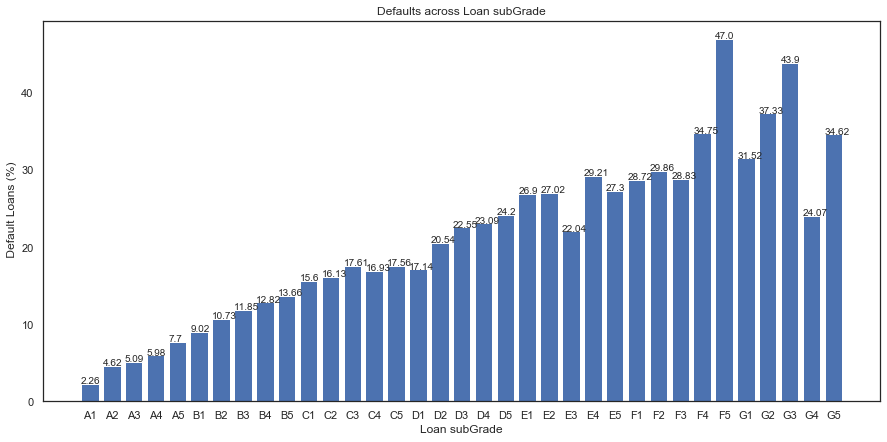

In [28]:
#Data anaysis for some categorical variables such as Sub grade of the loan

df_loan_grp6 = df_loan.groupby(['sub_grade'])
x_val = df_loan["sub_grade"].unique()
x_val.sort()

y_val = round((df_loan_grp6["loan_status"].count()-df_loan_grp6["loan_status"].sum()) / df_loan_grp6["loan_status"].count() * 100,2)

plot_bar_cust (x_val ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan subGrade' \
               ,'Loan subGrade',0)

# Default Rate is HIGHEST in F5 SUB-GRADE followed by G3

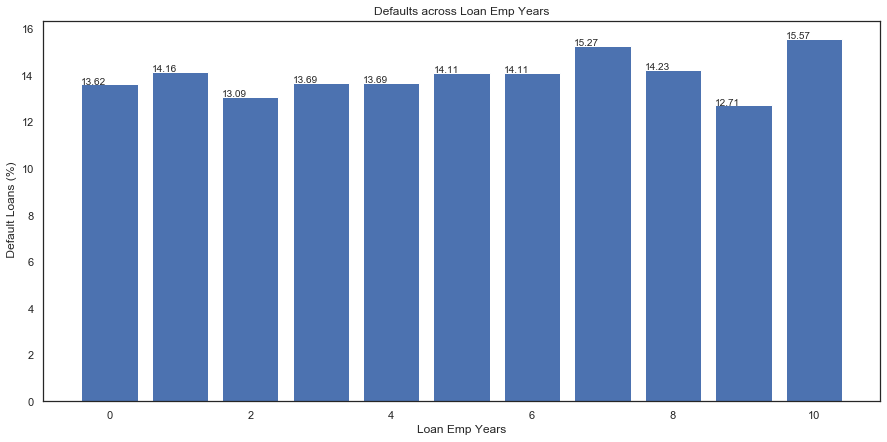

In [29]:
#Data anaysis for some categorical variables such as TEmployment Years of the loan

df_loan_grp7 = df_loan.groupby(['emp_length'])
x_val = df_loan["emp_length"].unique()
x_val.sort()


y_val = round((df_loan_grp7["loan_status"].count()-df_loan_grp7["loan_status"].sum()) / df_loan_grp7["loan_status"].count() * 100,2)

plot_bar_cust (x_val[:-1] ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan Emp Years' \
               ,'Loan Emp Years',0)

# Default Loans are highest for customer who have 10+ years of Employment. 

In [30]:
df_loan['pub_rec_bankruptcies'].unique()

array([ 0.,  1.,  2., nan])

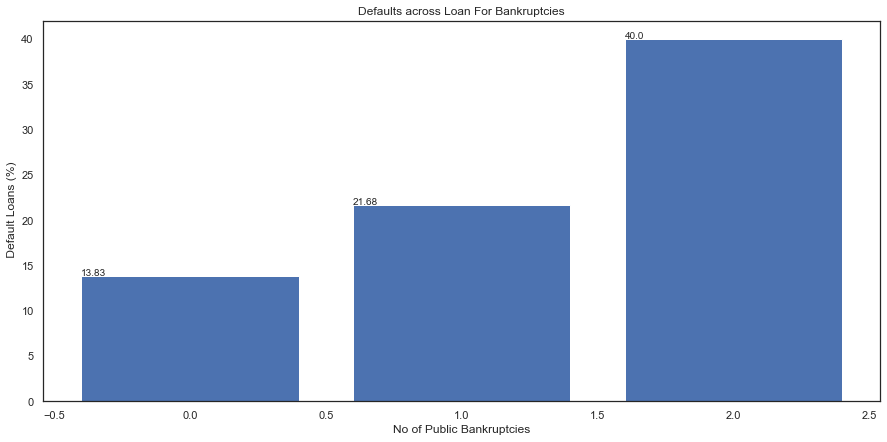

In [31]:
#Data anaysis for some categorical variables such as Public Record Bankruptcies of the loan

df_loan_grp8 = df_loan.groupby(['pub_rec_bankruptcies'])
x_val = df_loan["pub_rec_bankruptcies"].unique()
x_val.sort()

y_val = round((df_loan_grp8["loan_status"].count()-df_loan_grp8["loan_status"].sum()) / df_loan_grp8["loan_status"].count() * 100,2)

plot_bar_cust (x_val[:-1] ,y_val,' Default Loans (%)' \
               ,'Defaults across Loan For Bankruptcies' \
               ,'No of Public Bankruptcies',0)

# As number of Public Record Bankruptcies increases Default % increases. 

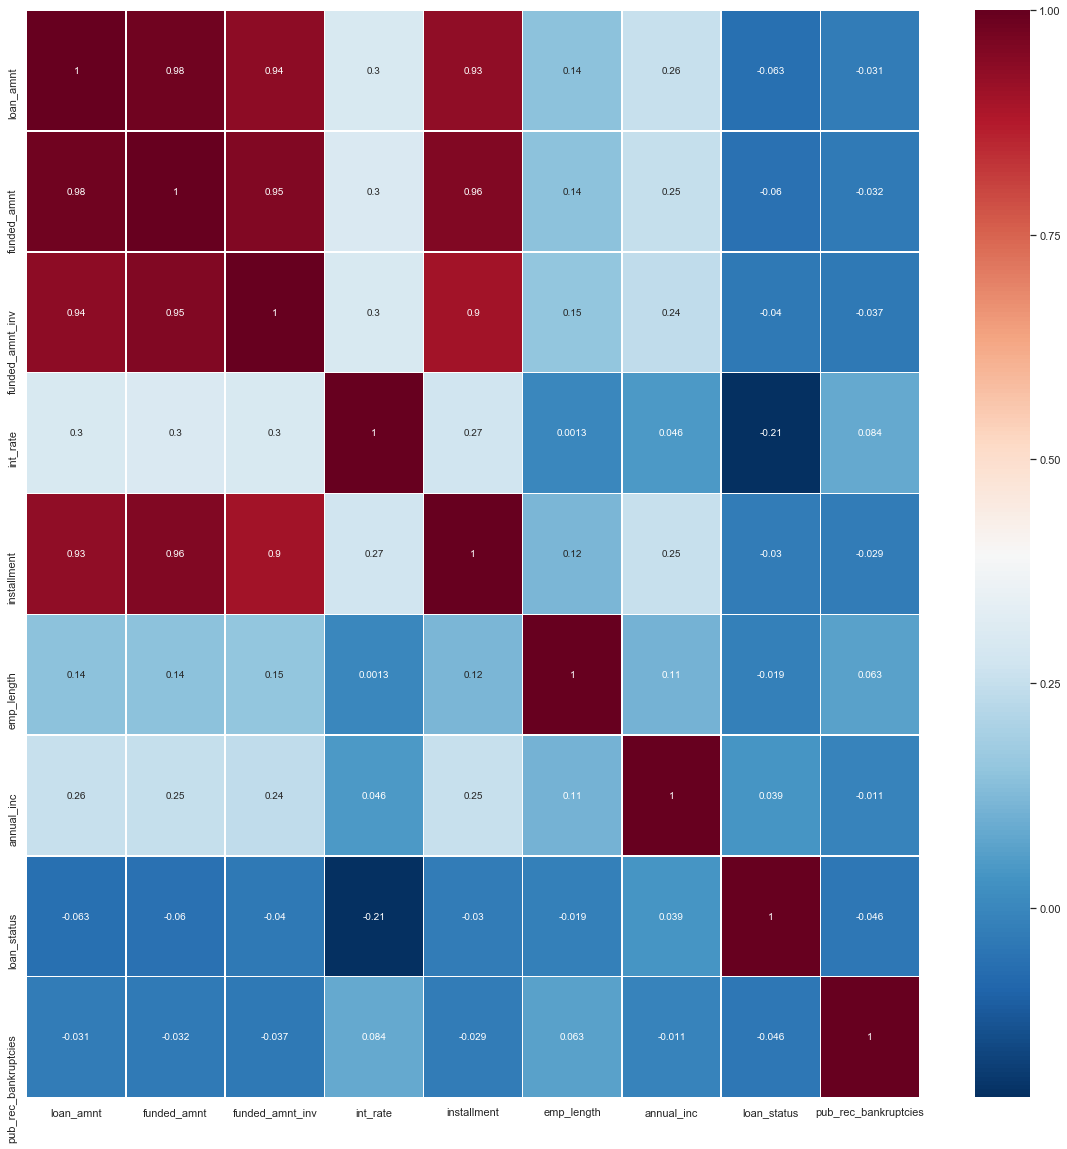

In [32]:
# Find the Correlation between few data variables 
df_loan_cr = df_loan[['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','pub_rec_bankruptcies']]
df_loan_corr = df_loan_cr.corr(method='pearson')

rcParams['figure.figsize'] = 20, 20
import seaborn as sb
sb.heatmap(df_loan_corr, \
            xticklabels=df_loan_corr.columns, \
            yticklabels=df_loan_corr.columns, \
            cmap='RdBu_r', \
            annot=True, \
            linewidth=0.5)

### No significant co-relation between these variable ['loan_amnt','funded_amnt','funded_amnt_inv','term','int_rate','installment','grade','sub_grade','emp_length','home_ownership','annual_inc','verification_status','loan_status','purpose','pub_rec_bankruptcies']

In [33]:
# Find the Correlation between Funded Amount Investment and Loan Status. 

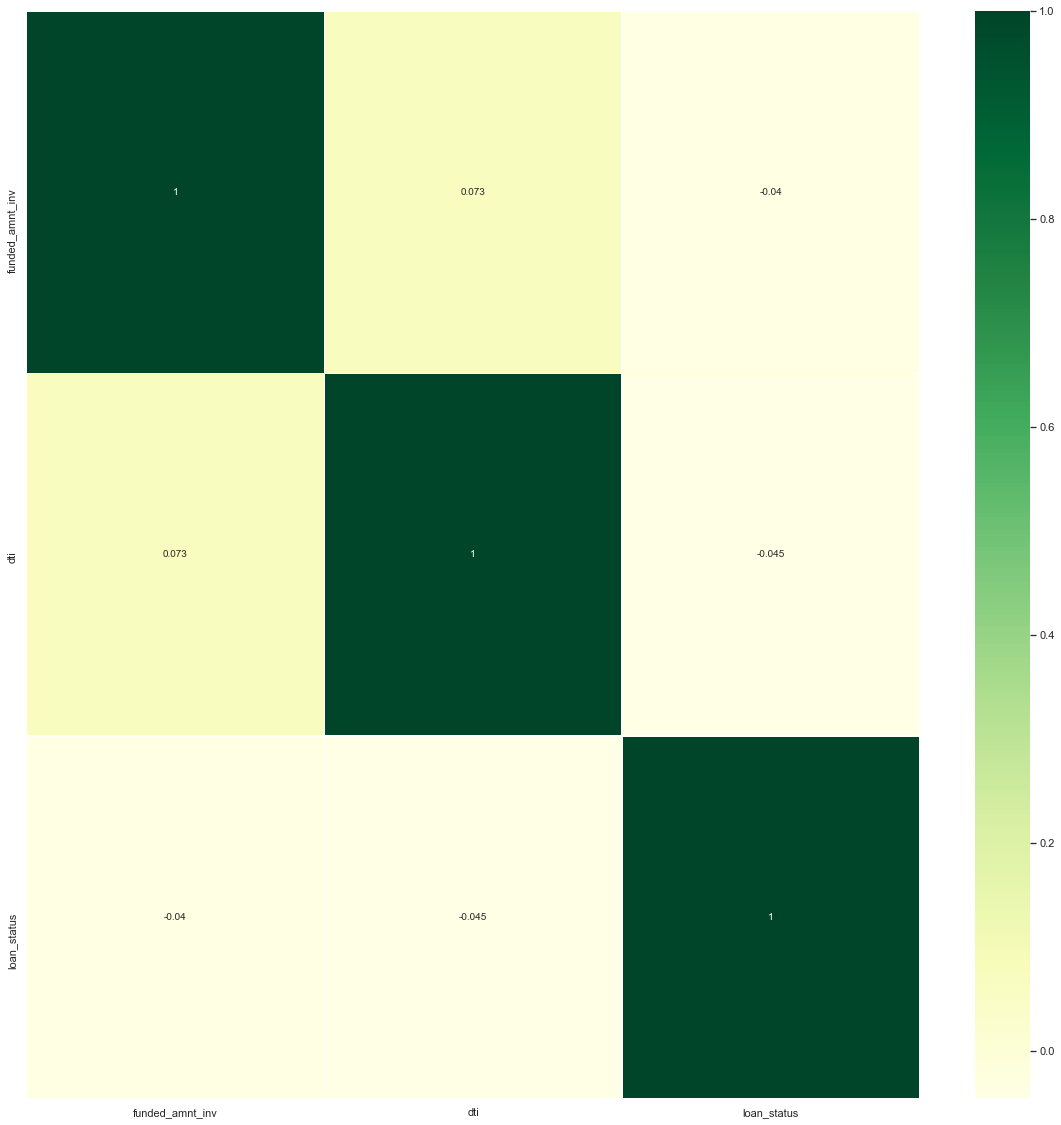

In [34]:

df_loan_dti_amnt = df_loan[['funded_amnt_inv','dti','loan_status']]
df_loan_corr = df_loan_dti_amnt.corr(method='pearson')

rcParams['figure.figsize'] = 20, 20
import seaborn as sb
sb.heatmap(df_loan_corr, \
            xticklabels=df_loan_corr.columns, \
            yticklabels=df_loan_corr.columns, \
            cmap='YlGn', \
            annot=True, \
            linewidth=0.5)

### No significant co-relation between DTI,Funded Amount and Loan status

posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values
posx and posy should be finite values


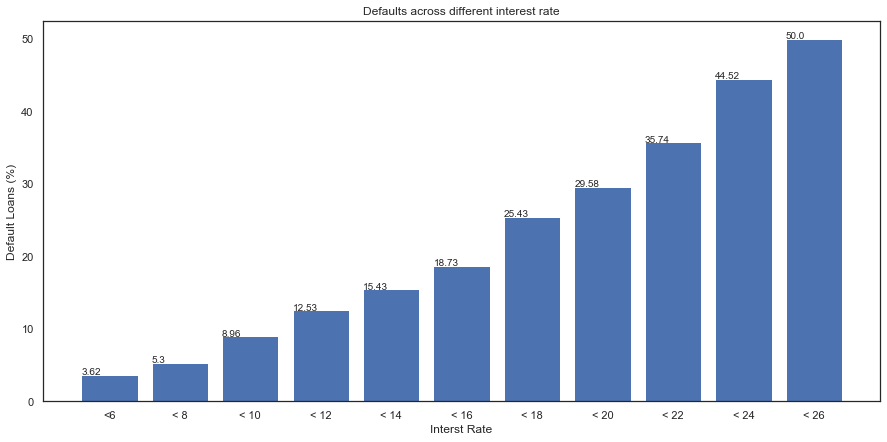

In [35]:
# Binning the categorical contineous data - 'int_rate'
int_rate_bins = [0, 2 ,4, 6, 8, 10, 12, 14, 16, 18,20,22,24,26]
bin_labels = ['< 2','< 4','<6','< 8','< 10','< 12','< 14','< 16','< 18','< 20','< 22','< 24','< 26']
df_loan['int_rate_binned'] = pd.cut(df_loan['int_rate'], bins=int_rate_bins ,labels=bin_labels)

df_loan_grp8 = df_loan.groupby("int_rate_binned")

y_val = round((df_loan_grp8["loan_status"].count() - df_loan_grp8["loan_status"].sum()) / df_loan_grp8["loan_status"].count() * 100,2)

plot_bar_cust (bin_labels ,y_val,'Default Loans (%)' \
               ,'Defaults across different interest rate' \
               ,'Interst Rate')

# Loans given with high interest rates greater than 24 % are having very high percentage of default rate. 

In [36]:
# Making dti as integer value 

df_loan['dti'] = round(df_loan['dti']).astype(int)

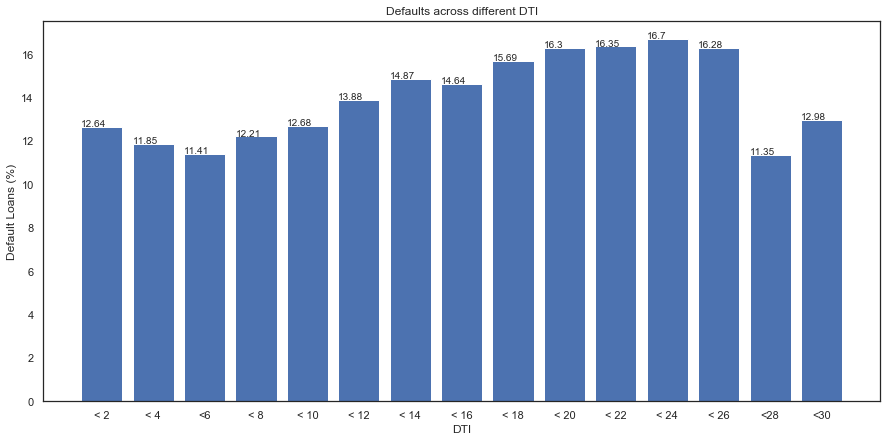

In [37]:
# Binning the categorical contineous data - 'dti'
dti_bins = [0, 2 ,4, 6, 8, 10, 12, 14, 16, 18,20,22,24,26,28,30]
bin_labels = ['< 2','< 4','<6','< 8','< 10','< 12','< 14','< 16','< 18','< 20','< 22','< 24','< 26','<28','<30']
df_loan['dti_binned'] = pd.cut(df_loan['dti'], bins=dti_bins ,labels=bin_labels)

df_loan_grp9 = df_loan.groupby("dti_binned")

y_val = round((df_loan_grp9["loan_status"].count()-df_loan_grp9["loan_status"].sum()) / df_loan_grp9["loan_status"].count() * 100,2)

plot_bar_cust (bin_labels ,y_val,'Default Loans (%)' \
               ,'Defaults across different DTI' \
               ,'DTI')

# DTI ranging from 20 -26 are having high percentage of default loans. 

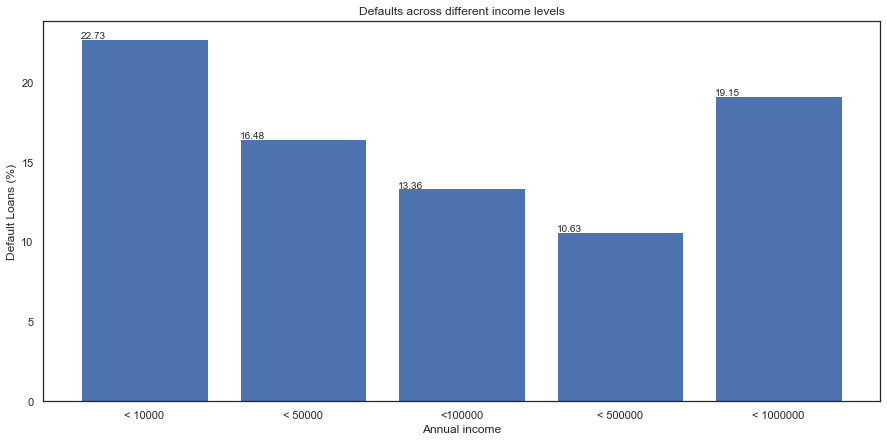

In [46]:
# Binning the categorical contineous data - 'annual_inc'
annual_inc_bins = [0, 10000 ,50000, 100000, 500000 ,1000000]
bin_labels = ['< 10000','< 50000','<100000','< 500000','< 1000000']
df_loan['annual_inc_binned'] = pd.cut(df_loan['annual_inc'], bins=annual_inc_bins ,labels=bin_labels)

df_loan_grp10 = df_loan.groupby("annual_inc_binned")

y_val = round((df_loan_grp10["loan_status"].count()-df_loan_grp10["loan_status"].sum()) / df_loan_grp10["loan_status"].count() * 100,2)

plot_bar_cust (bin_labels ,y_val,'Default Loans (%)' \
               ,'Defaults across different income levels' \
               ,'Annual income')

# Default Percentage is inversely propostional to Annual Income. 

# Bivariate Analysis 

- We will see what is the impact of Term vs Purpose on Default Percentage. - Categorical Bivariate analysis
- We can see if we have any impact on dti funded_amnt_inv on Default Percentage.


In [39]:
df_loan['term'].unique()

array([' 60 months', ' 36 months'], dtype=object)

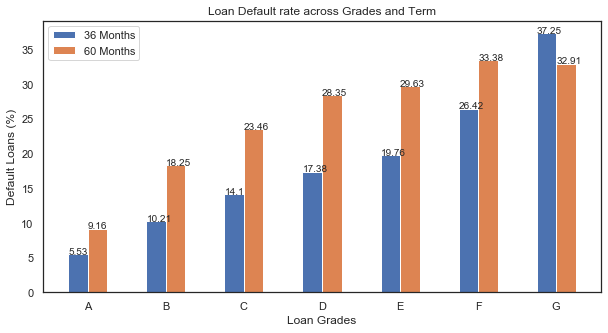

In [40]:
#bivariate analysis - Impact of term across grades, term and default rates

df_loan_grp_bi = df_loan.groupby(["grade","term"])
df_loan_grp_bi1 = df_loan.groupby(["grade","term"],as_index=False)
x_val = df_loan["grade"].unique()
x_val.sort()

#create new df
df_36 = df_loan[df_loan['term'].str.strip() == '36 months']
df_60 = df_loan[df_loan['term'].str.strip() == '60 months']

df_36_grp = df_36.groupby("grade")
df_60_grp = df_60.groupby("grade")

y_val36 = round((df_36_grp["loan_status"].count() - df_36_grp["loan_status"].sum()) / df_36_grp["loan_status"].count()*100,2)
y_val60 = round((df_60_grp["loan_status"].count() - df_60_grp["loan_status"].sum()) / df_60_grp["loan_status"].count()*100,2)

x_pos = list(range(len(y_val36))) 
width = 0.25 
fig, term = plt.subplots(figsize=(10,5))
bars36 = plt.bar( x_pos, y_val36, align='center', width=width ,alpha=1)
bars60 = plt.bar( [p + width for p in x_pos], y_val60, width=width ,align='center', alpha=1)

plt.ylabel('Default Loans (%)')
plt.xlabel('Loan Grades')
plt.title('Loan Default rate across Grades and Term')

term.set_xticks([p + 0.5 * width for p in x_pos])

term.set_xticklabels(x_val)

for bar in bars36:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

for bar in bars60:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

plt.legend(['36 Months', '60 Months'], loc='upper left')
plt.show()

- As per the Bivariate Analysis we can see that % of Default loan increases as Grade decreases . 
- There is another observation, we can see that % of Default loan is high in 60 months except Grade G 

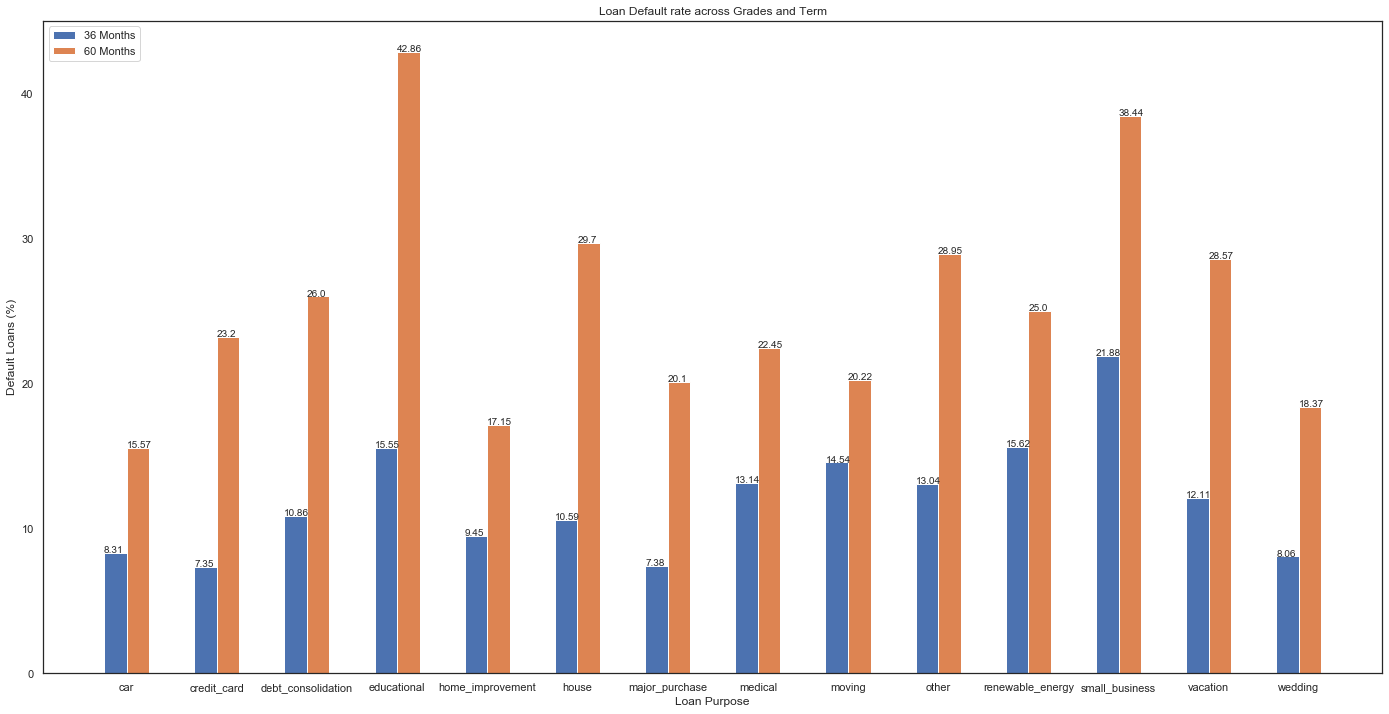

In [41]:
#bivariate analysis - Impact of term across purpose, term and default rates

df_loan_grp_bi_2 = df_loan.groupby(["purpose","term"])
df_loan_grp_bi2 = df_loan.groupby(["purpose","term"],as_index=False)
x_val = df_loan["purpose"].unique()
x_val.sort()

#create new df
df_36 = df_loan[df_loan['term'].str.strip() == '36 months']
df_60 = df_loan[df_loan['term'].str.strip() == '60 months']

df_36_grp = df_36.groupby("purpose")
df_60_grp = df_60.groupby("purpose")

y_val36 = round((df_36_grp["loan_status"].count() - df_36_grp["loan_status"].sum()) / df_36_grp["loan_status"].count()*100,2)
y_val60 = round((df_60_grp["loan_status"].count() - df_60_grp["loan_status"].sum()) / df_60_grp["loan_status"].count()*100,2)

x_pos = list(range(len(y_val36))) 
width = 0.25 
fig, term = plt.subplots(figsize=(24,12))
bars36 = plt.bar( x_pos, y_val36, align='center', width=width ,alpha=1)
bars60 = plt.bar( [p + width for p in x_pos], y_val60, width=width ,align='center', alpha=1)

plt.ylabel('Default Loans (%)')
plt.xlabel('Loan Purpose')
plt.title('Loan Default rate across Grades and Term')

term.set_xticks([p + 0.5 * width for p in x_pos])

term.set_xticklabels(x_val)

for bar in bars36:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

for bar in bars60:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

plt.legend(['36 Months', '60 Months'], loc='upper left')
plt.show()

- Education Purpose of the loan is having highest Default percentage for 60 months but small Business is having highest default percentage for 36 Months

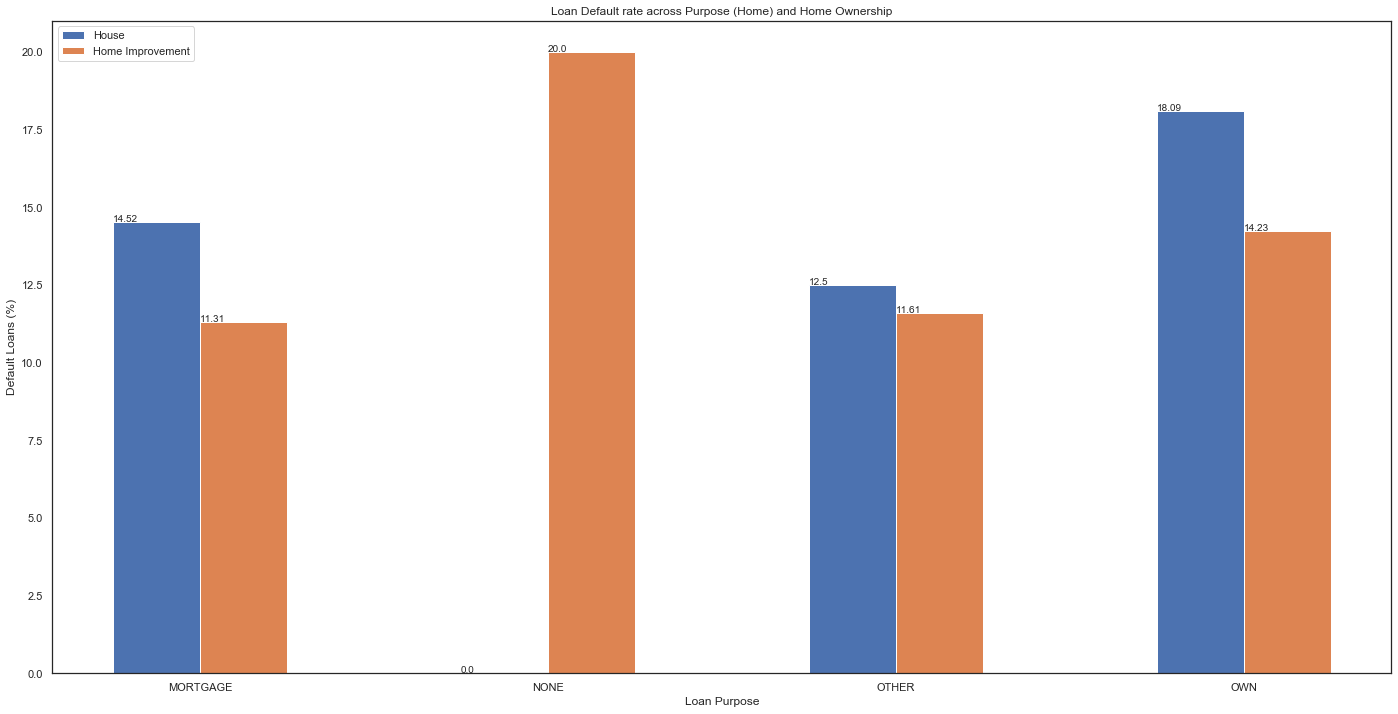

In [42]:
#bivariate analysis - Impact of term across Home Ownership, Purpose as Home or Home Improvement and default rates

df_loan_grp_bi_3 = df_loan.groupby(["home_ownership","purpose"])
df_loan_grp_bi3 = df_loan.groupby(["home_ownership","purpose"],as_index=False)
x_val = df_loan["home_ownership"].unique()
x_val.sort()

#create new df
df_house = df_loan[df_loan['purpose'] == 'house']
df_hom_impr = df_loan[df_loan['purpose'] == 'home_improvement']

df_house_grp = df_house.groupby("home_ownership")
df_home_imp_grp = df_hom_impr.groupby("home_ownership")

y_valhouse = round((df_house_grp["loan_status"].count() - df_house_grp["loan_status"].sum()) / df_house_grp["loan_status"].count()*100,2)
y_valhom_impr = round((df_home_imp_grp["loan_status"].count() - df_home_imp_grp["loan_status"].sum()) / df_home_imp_grp["loan_status"].count()*100,2)

x_pos = list(range(len(y_valhouse))) 
width = 0.25 
fig, term = plt.subplots(figsize=(24,12))
bars36 = plt.bar( x_pos, y_valhouse, align='center', width=width ,alpha=1)
bars60 = plt.bar( [p + width for p in x_pos], y_valhom_impr, width=width ,align='center', alpha=1)

plt.ylabel('Default Loans (%)')
plt.xlabel('Loan Purpose')
plt.title('Loan Default rate across Purpose (Home) and Home Ownership')

term.set_xticks([p + 0.5 * width for p in x_pos])

term.set_xticklabels(x_val)

for bar in bars36:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

for bar in bars60:
    ht = bar.get_height()
    plt.text(bar.get_x(), ht + .005, ht,rotation=0)

plt.legend(['House', 'Home Improvement'], loc='upper left')
plt.show()

- We can see that Home ownership type None is having highest default rate whose purpose is for home improvement. 

- Customers are availing the loan who has no home but still availing loan for home improvement and defaulting

- Default ratio of Customers who is defaulting for home loan is more than home improvement loan other than NONE category


In [43]:
# Year wise Percentage of Default ratio in both the terms 36 months and 60 months. 

In [44]:
#df_loan['issue_d'] = pd.to_datetime(df_loan['issue_d'])
#df_loan['issue_year'] = df_loan['issue_d'].dt.year
df_loan['issue_year'] = "20" + df_loan['issue_d'].str.slice(4,6)

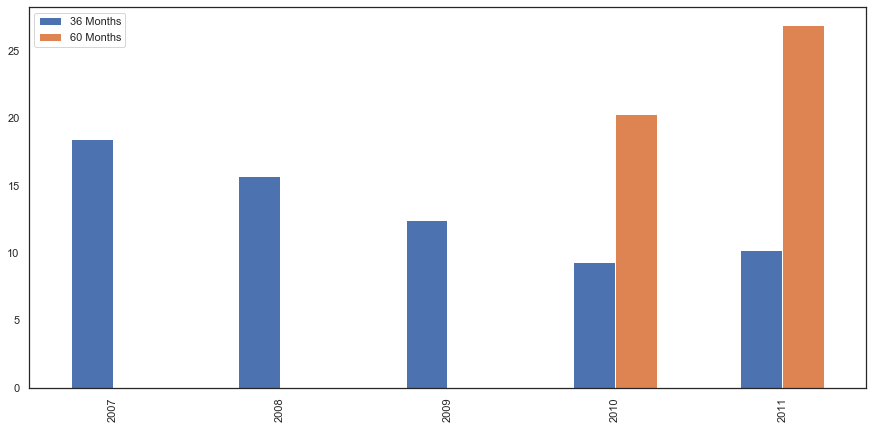

In [45]:
#bivariate analysis - Impact of term across Issue Year, term and default rates

df_loan_grp_bi_4 = df_loan.groupby(["issue_year","term"])
df_loan_grp_bi4 = df_loan.groupby(["issue_year","term"],as_index=False)
x_val = df_loan["issue_year"].unique()
x_val.sort()

#create new df
df_36 = df_loan[df_loan['term'].str.strip() == '36 months']
df_60 = df_loan[df_loan['term'].str.strip() == '60 months']

df_36_grp = df_36.groupby("issue_year")
df_60_grp = df_60.groupby("issue_year")

y_val36 = round((df_36_grp["loan_status"].count() - df_36_grp["loan_status"].sum()) / df_36_grp["loan_status"].count()*100,2)
y_val60 = round((df_60_grp["loan_status"].count() - df_60_grp["loan_status"].sum()) / df_60_grp["loan_status"].count()*100,2)

df = pd.concat([y_val36.rename("36 Months") ,y_val60.rename("60 Months")], axis=1 ,sort=True)
df.plot.bar()

